In [2]:
import numpy as np
# load data from ReachData.npz
data=np.load('ReachData.npz')
r=data['r']
targets=data['targets']
target_index=data['cfr']
data.close()   

# Question1:Plan data only vs movement data (30 pts)

In [3]:
import pandas as pd
import random

cfr=pd.Series(target_index)
training_data=np.array([])
testing_data=np.array([])
# randomly select 400 trials(50 trials for each target) as traning data, and also pick out remaining data as test data 
for i in range(8):
    i+=1
    cfr_i=cfr[cfr.values==i]
    t1=random.sample(range(len(cfr_i.index)),50)
    t1.sort()
    t2=[cfr_i.index[l] for l in t1]
    t3=list(set(cfr_i.index)-set(t2))
    training_data=np.append(training_data,t2)
    testing_data=np.append(testing_data,t3)

In [4]:
training_data.sort()
training_data=np.int_(training_data)
# calculate spikes in plan, move and combined window individually, and its respective time with all the 190 neurons.
N=[]
N_time=[]
n_plan=[]
n_plantime=[]
n_move=[]
n_movetime=[]
for i in range(len(training_data)):
    p1=r[training_data[i]].timeTouchHeld
    p2=r[training_data[i]].timeGoCue
    p3=r[training_data[i]].timeTargetAcquire
    N2,N_time2,n_plan2,n_plantime2,n_move2,n_movetime2=np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])
    for l in range(190):
        if type(r[training_data[i]].unit[l].spikeTimes) == float:   # when there is only one spike and its spiketime
            N0=(r[training_data[i]].unit[l].spikeTimes>p1) & (r[training_data[i]].unit[l].spikeTimes<p3)
            N1=np.sum(N0)
            n_plan0=(r[training_data[i]].unit[l].spikeTimes>p1) & (r[training_data[i]].unit[l].spikeTimes<p2)
            n_plan1=np.sum(n_plan0)
            n_move0=(r[training_data[i]].unit[l].spikeTimes>p2) & (r[training_data[i]].unit[l].spikeTimes<p3)
            n_move1=np.sum(n_move0)
        elif list(r[training_data[i]].unit[l].spikeTimes) == []:   # when there is no spike and its spiketime
            N1=0
            n_plan1=0
            n_move1=0
        else:                                                     # when there are more than one spikes and their spiketimes
            N0=(r[training_data[i]].unit[l].spikeTimes>p1) & (r[training_data[i]].unit[l].spikeTimes<p3)
            N1=np.sum(N0)
            n_plan0=(r[training_data[i]].unit[l].spikeTimes>p1) & (r[training_data[i]].unit[l].spikeTimes<p2)
            n_plan1=np.sum(n_plan0)
            n_move0=(r[training_data[i]].unit[l].spikeTimes>p2) & (r[training_data[i]].unit[l].spikeTimes<p3)
            n_move1=np.sum(n_move0)
        N_time1=p3-p1
        n_movetime1=p3-p2
        n_plantime1=p2-p1
        
        N2=np.append(N2,N1)
        N_time2=np.append(N_time2,N_time1)
        n_plan2=np.append(n_plan2,n_plan1)
        n_plantime2=np.append(n_plantime2,n_plantime1)
        n_move2=np.append(n_move2,n_move1)
        n_movetime2=np.append(n_movetime2,n_movetime1)
    N.append(N2)
    N_time.append(N_time2)
    n_plan.append(n_plan2)
    n_plantime.append(n_plantime2)
    n_move.append(n_move2)
    n_movetime.append(n_movetime2)

In [19]:
target0=[cfr[i] for i in training_data]
table1=pd.DataFrame(target0,index=training_data,columns=['targets']) # index represent the i th trials
table1['Combined']=N
table1['Combined_time']=N_time
table1['n_plan']=n_plan
table1['n_plantime']=n_plantime
table1['n_move']=n_move
table1['n_movetime']=n_movetime

table2=table1.groupby('targets').sum() #add all trials data(spikes and spiketimes) belong to the specific target.
# calculate respective rate for poission model.
table2['Combined_rate']=table2['Combined']/table2['Combined_time']
table2['n_plan_rate']=table2['n_plan']/table2['n_plantime']
table2['n_move_rate']=table2['n_move']/table2['n_movetime']

table2

,Combined,Combined_time,n_plan,n_plantime,n_move,n_movetime,Combined_rate,n_plan_rate,n_move_rate
targets,,,,,,,,,
1,"[58.0, 596.0, 196.0, 833.0, 796.0, 479.0, 370....","[70030.0, 70030.0, 70030.0, 70030.0, 70030.0, ...","[54.0, 169.0, 105.0, 370.0, 320.0, 130.0, 67.0...","[43000.0, 43000.0, 43000.0, 43000.0, 43000.0, ...","[4.0, 427.0, 91.0, 463.0, 476.0, 349.0, 303.0,...","[27030.0, 27030.0, 27030.0, 27030.0, 27030.0, ...","[0.000828216478652, 0.00851063829787, 0.002798...","[0.00125581395349, 0.00393023255814, 0.0024418...","[0.000147983721791, 0.0157972623011, 0.0033666..."
2,"[74.0, 582.0, 186.0, 907.0, 837.0, 557.0, 355....","[69820.0, 69820.0, 69820.0, 69820.0, 69820.0, ...","[67.0, 175.0, 99.0, 373.0, 318.0, 147.0, 68.0,...","[42500.0, 42500.0, 42500.0, 42500.0, 42500.0, ...","[7.0, 407.0, 87.0, 534.0, 519.0, 410.0, 287.0,...","[27320.0, 27320.0, 27320.0, 27320.0, 27320.0, ...","[0.0010598682326, 0.00833572042395, 0.00266399...","[0.00157647058824, 0.00411764705882, 0.0023294...","[0.000256222547584, 0.014897510981, 0.00318448..."
3,"[46.0, 526.0, 199.0, 724.0, 946.0, 576.0, 406....","[72545.0, 72545.0, 72545.0, 72545.0, 72545.0, ...","[38.0, 173.0, 122.0, 346.0, 383.0, 153.0, 108....","[45000.0, 45000.0, 45000.0, 45000.0, 45000.0, ...","[8.0, 353.0, 77.0, 378.0, 563.0, 423.0, 298.0,...","[27545.0, 27545.0, 27545.0, 27545.0, 27545.0, ...","[0.000634089186022, 0.00725067199669, 0.002743...","[0.000844444444444, 0.00384444444444, 0.002711...","[0.000290433835542, 0.0128153929933, 0.0027954..."
4,"[49.0, 591.0, 160.0, 945.0, 892.0, 588.0, 456....","[71725.0, 71725.0, 71725.0, 71725.0, 71725.0, ...","[48.0, 183.0, 101.0, 392.0, 353.0, 151.0, 96.0...","[44500.0, 44500.0, 44500.0, 44500.0, 44500.0, ...","[1.0, 408.0, 59.0, 553.0, 539.0, 437.0, 360.0,...","[27225.0, 27225.0, 27225.0, 27225.0, 27225.0, ...","[0.000683164865807, 0.00823980481004, 0.002230...","[0.00107865168539, 0.00411235955056, 0.0022696...","[3.67309458219e-05, 0.0149862258953, 0.0021671..."
5,"[16.0, 572.0, 187.0, 950.0, 878.0, 643.0, 510....","[71600.0, 71600.0, 71600.0, 71600.0, 71600.0, ...","[16.0, 235.0, 127.0, 403.0, 385.0, 179.0, 123....","[45000.0, 45000.0, 45000.0, 45000.0, 45000.0, ...","[0.0, 337.0, 60.0, 547.0, 493.0, 464.0, 387.0,...","[26600.0, 26600.0, 26600.0, 26600.0, 26600.0, ...","[0.000223463687151, 0.00798882681564, 0.002611...","[0.000355555555556, 0.00522222222222, 0.002822...","[0.0, 0.0126691729323, 0.00225563909774, 0.020..."
6,"[16.0, 738.0, 96.0, 886.0, 990.0, 695.0, 552.0...","[68920.0, 68920.0, 68920.0, 68920.0, 68920.0, ...","[15.0, 278.0, 63.0, 450.0, 473.0, 301.0, 211.0...","[44750.0, 44750.0, 44750.0, 44750.0, 44750.0, ...","[1.0, 460.0, 33.0, 436.0, 517.0, 394.0, 341.0,...","[24170.0, 24170.0, 24170.0, 24170.0, 24170.0, ...","[0.000232153221126, 0.0107080673244, 0.0013929...","[0.000335195530726, 0.00621229050279, 0.001407...","[4.13736036409e-05, 0.0190318576748, 0.0013653..."
7,"[11.0, 599.0, 114.0, 900.0, 874.0, 672.0, 535....","[70340.0, 70340.0, 70340.0, 70340.0, 70340.0, ...","[11.0, 238.0, 71.0, 395.0, 393.0, 240.0, 149.0...","[44250.0, 44250.0, 44250.0, 44250.0, 44250.0, ...","[0.0, 361.0, 43.0, 505.0, 481.0, 432.0, 386.0,...","[26090.0, 26090.0, 26090.0, 26090.0, 26090.0, ...","[0.000156383281206, 0.00851578049474, 0.001620...","[0.000248587570621, 0.00537853107345, 0.001604...","[0.0, 0.0138367190494, 0.00164814105021, 0.019..."
8,"[13.0, 683.0, 77.0, 904.0, 939.0, 646.0, 484.0...","[68605.0, 68605.0, 68605.0, 68605.0, 68605.0, ...","[8.0, 278.0, 49.0, 424.0, 435.0, 270.0, 153.0,...","[43750.0, 43750.0, 43750.0, 43750.0, 43750.0, ...","[5.0, 405.0, 28.0, 480.0, 504.0, 376.0, 331.0,...","[24855.0, 24855.0, 24855.0, 24855.0, 24855.0, ...","[0.000189490561912, 0.00995554259894, 0.001122...","[0.000182857142857, 0.00635428571429, 0.00112,...","[0.00020116676725, 0.0162945081473, 0.00112653..."


In [6]:
testing_data.sort()
testing_data=np.int_(testing_data)
test_N=[]
test_N_time=[]
test_n_plan=[]
test_n_plantime=[]
test_n_move=[]
test_n_movetime=[]
# calculate spikes in plan, move and combined window individually, and its respective time with all the 190 neurons.
for i in range(len(testing_data)):
    p1=r[testing_data[i]].timeTouchHeld
    p2=r[testing_data[i]].timeGoCue
    p3=r[testing_data[i]].timeTargetAcquire
    test_N2,test_N_time2,test_n_plan2,test_n_plantime2,test_n_move2,test_n_movetime2=np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])
    for l in range(190):
        if type(r[testing_data[i]].unit[l].spikeTimes) == float:
            test_N0=(r[testing_data[i]].unit[l].spikeTimes>p1) & (r[testing_data[i]].unit[l].spikeTimes<p3)
            test_N1=np.sum(test_N0)
            test_n_plan0=(r[testing_data[i]].unit[l].spikeTimes>p1) & (r[testing_data[i]].unit[l].spikeTimes<p2)
            test_n_plan1=np.sum(test_n_plan0)
            test_n_move0=(r[testing_data[i]].unit[l].spikeTimes>p2) & (r[testing_data[i]].unit[l].spikeTimes<p3)
            test_n_move1=np.sum(test_n_move0)
        elif list(r[testing_data[i]].unit[l].spikeTimes) == []:
            test_N1=0
            test_n_plan1=0
            test_n_move1=0
        else:
            test_N0=(r[testing_data[i]].unit[l].spikeTimes>p1) & (r[testing_data[i]].unit[l].spikeTimes<p3)
            test_N1=np.sum(test_N0)
            test_n_plan0=(r[testing_data[i]].unit[l].spikeTimes>p1) & (r[testing_data[i]].unit[l].spikeTimes<p2)
            test_n_plan1=np.sum(test_n_plan0)
            test_n_move0=(r[testing_data[i]].unit[l].spikeTimes>p2) & (r[testing_data[i]].unit[l].spikeTimes<p3)
            test_n_move1=np.sum(test_n_move0)
        test_N_time1=p3-p1
        test_n_movetime1=p3-p2
        test_n_plantime1=p2-p1
        
        test_N2=np.append(test_N2,test_N1)
        test_N_time2=np.append(test_N_time2,test_N_time1)
        test_n_plan2=np.append(test_n_plan2,test_n_plan1)
        test_n_plantime2=np.append(test_n_plantime2,test_n_plantime1)
        test_n_move2=np.append(test_n_move2,test_n_move1)
        test_n_movetime2=np.append(test_n_movetime2,test_n_movetime1)
    test_N.append(test_N2)
    test_N_time.append(test_N_time2)
    test_n_plan.append(test_n_plan2)
    test_n_plantime.append(test_n_plantime2)
    test_n_move.append(test_n_move2)
    test_n_movetime.append(test_n_movetime2)

In [20]:
test_target0=[cfr[i] for i in testing_data]
test_table1=pd.DataFrame(test_target0,index=testing_data,columns=['targets']) # index represent the i th trials
test_table1['Combined']=test_N
test_table1['Combined_time']=test_N_time
test_table1['n_plan']=test_n_plan
test_table1['n_plantime']=test_n_plantime
test_table1['n_move']=test_n_move
test_table1['n_movetime']=test_n_movetime
test_table1

,targets,Combined,Combined_time,n_plan,n_plantime,n_move,n_movetime
0,4,"[3.0, 16.0, 4.0, 24.0, 30.0, 12.0, 15.0, 31.0,...","[1525.0, 1525.0, 1525.0, 1525.0, 1525.0, 1525....","[3.0, 8.0, 1.0, 9.0, 14.0, 4.0, 5.0, 16.0, 4.0...","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 8.0, 3.0, 15.0, 16.0, 8.0, 10.0, 15.0, 9...","[520.0, 520.0, 520.0, 520.0, 520.0, 520.0, 520..."
4,6,"[0.0, 7.0, 0.0, 28.0, 27.0, 15.0, 10.0, 20.0, ...","[1250.0, 1250.0, 1250.0, 1250.0, 1250.0, 1250....","[0.0, 3.0, 0.0, 15.0, 9.0, 9.0, 6.0, 7.0, 5.0,...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 4.0, 0.0, 13.0, 18.0, 6.0, 4.0, 13.0, 10...","[495.0, 495.0, 495.0, 495.0, 495.0, 495.0, 495..."
5,8,"[0.0, 16.0, 1.0, 16.0, 20.0, 20.0, 15.0, 18.0,...","[1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500....","[0.0, 8.0, 0.0, 3.0, 10.0, 12.0, 8.0, 8.0, 3.0...","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 8.0, 1.0, 13.0, 10.0, 8.0, 7.0, 10.0, 4....","[495.0, 495.0, 495.0, 495.0, 495.0, 495.0, 495..."
6,8,"[0.0, 15.0, 0.0, 22.0, 25.0, 16.0, 13.0, 13.0,...","[1275.0, 1275.0, 1275.0, 1275.0, 1275.0, 1275....","[0.0, 6.0, 0.0, 11.0, 8.0, 6.0, 7.0, 4.0, 2.0,...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 9.0, 0.0, 11.0, 17.0, 10.0, 6.0, 9.0, 12...","[520.0, 520.0, 520.0, 520.0, 520.0, 520.0, 520..."
7,4,"[0.0, 13.0, 5.0, 14.0, 24.0, 16.0, 8.0, 10.0, ...","[1275.0, 1275.0, 1275.0, 1275.0, 1275.0, 1275....","[0.0, 3.0, 2.0, 4.0, 12.0, 5.0, 1.0, 7.0, 5.0,...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 10.0, 3.0, 10.0, 12.0, 11.0, 7.0, 3.0, 1...","[520.0, 520.0, 520.0, 520.0, 520.0, 520.0, 520..."
11,5,"[3.0, 15.0, 0.0, 21.0, 30.0, 17.0, 10.0, 10.0,...","[1330.0, 1330.0, 1330.0, 1330.0, 1330.0, 1330....","[3.0, 4.0, 0.0, 6.0, 6.0, 6.0, 1.0, 5.0, 0.0, ...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 11.0, 0.0, 15.0, 24.0, 11.0, 9.0, 5.0, 9...","[575.0, 575.0, 575.0, 575.0, 575.0, 575.0, 575..."
12,7,"[0.0, 9.0, 2.0, 20.0, 17.0, 13.0, 18.0, 15.0, ...","[1225.0, 1225.0, 1225.0, 1225.0, 1225.0, 1225....","[0.0, 2.0, 2.0, 7.0, 4.0, 10.0, 7.0, 7.0, 5.0,...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 7.0, 0.0, 13.0, 13.0, 3.0, 11.0, 8.0, 8....","[470.0, 470.0, 470.0, 470.0, 470.0, 470.0, 470..."
14,3,"[0.0, 5.0, 1.0, 9.0, 18.0, 12.0, 7.0, 21.0, 15...","[1335.0, 1335.0, 1335.0, 1335.0, 1335.0, 1335....","[0.0, 1.0, 1.0, 1.0, 6.0, 2.0, 0.0, 10.0, 5.0,...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 4.0, 0.0, 8.0, 12.0, 10.0, 7.0, 11.0, 10...","[580.0, 580.0, 580.0, 580.0, 580.0, 580.0, 580..."
15,8,"[0.0, 13.0, 1.0, 14.0, 20.0, 12.0, 13.0, 10.0,...","[1240.0, 1240.0, 1240.0, 1240.0, 1240.0, 1240....","[0.0, 3.0, 0.0, 9.0, 5.0, 5.0, 8.0, 4.0, 3.0, ...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 10.0, 1.0, 5.0, 15.0, 7.0, 5.0, 6.0, 1.0...","[485.0, 485.0, 485.0, 485.0, 485.0, 485.0, 485..."
16,7,"[0.0, 19.0, 4.0, 22.0, 17.0, 19.0, 14.0, 16.0,...","[1500.0, 1500.0, 1500.0, 1500.0, 1500.0, 1500....","[0.0, 13.0, 3.0, 10.0, 11.0, 8.0, 6.0, 5.0, 6....","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 6.0, 1.0, 12.0, 6.0, 11.0, 8.0, 11.0, 6....","[495.0, 495.0, 495.0, 495.0, 495.0, 495.0, 495..."


### Using Combining plan and movement data

In [8]:
# Maxmium liklihood parameter estimate:Pr(𝐶𝑘 ∣ x) = Pr(x ∣ 𝐶𝑘)Pr(𝐶𝑘)/Pr (x) and 𝑚 = argmax Pr(𝐶𝑘 ∣ x)
# Since the Pr(x) and Pr(Ck) are keeping constant within the whole estimation(each Pr(Ck) are assigned to be identical)
# So we can assign x to be class Ck by finding the k which make Pr(Ck|x) maximum.
# In our case, it's poisson model, so make poisson.logpmf(x,rate*time) maximum.

from scipy.stats.distributions import poisson
forecast_target_combined=[]
for i in range(len(test_table1['Combined'])):
    P=[]
    for l in range(8):
        p=poisson.logpmf(list(test_table1['Combined'])[i],list(table2['Combined_rate'])[l]*list(test_table1['Combined_time'])[i])
        p2=p.sum()
        P.append(p2)
    tg=P.index(max(P))+1
    forecast_target_combined.append(tg)

In [9]:
test_table1['forecast_target_combined']=forecast_target_combined
# find those trials decoding correctly.
decoded_correctly_combined=test_table1[test_table1['targets']==test_table1['forecast_target_combined']]

decoding_accuracy_combined=len(decoded_correctly_combined)/len(test_table1)
print('The overall decoding accuracy using Combining plan and movement data: %.5f'%decoding_accuracy_combined)

The overall decoding accuracy using Combining plan and movement data: 0.99037


### Using only the data in the plan window

In [10]:
forecast_target_plan=[]
for i in range(len(test_table1['n_plan'])):
    P=[]
    for l in range(8):
        p=poisson.logpmf(list(test_table1['n_plan'])[i],list(table2['n_plan_rate'])[l]*list(test_table1['n_plantime'])[i])
        p2=p.sum()
        P.append(p2)
    tg=P.index(max(P))+1
    forecast_target_plan.append(tg)

In [11]:
del test_table1['forecast_target_combined']
test_table1['forecast_target_plan']=forecast_target_plan
decoded_correctly_plan=test_table1[test_table1['targets']==test_table1['forecast_target_plan']]

decoding_accuracy_plan=len(decoded_correctly_plan)/len(test_table1)
print('The overall decoding accuracy only using plan data: %.5f'%decoding_accuracy_plan)

The overall decoding accuracy only using plan data: 0.89133


In [21]:
table1

,targets,Combined,Combined_time,n_plan,n_plantime,n_move,n_movetime
1,1,"[1.0, 11.0, 1.0, 16.0, 16.0, 11.0, 7.0, 18.0, ...","[1525.0, 1525.0, 1525.0, 1525.0, 1525.0, 1525....","[1.0, 6.0, 0.0, 7.0, 7.0, 3.0, 1.0, 10.0, 4.0,...","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 5.0, 1.0, 9.0, 9.0, 8.0, 6.0, 8.0, 4.0, ...","[520.0, 520.0, 520.0, 520.0, 520.0, 520.0, 520..."
2,7,"[1.0, 11.0, 3.0, 19.0, 26.0, 17.0, 13.0, 14.0,...","[1495.0, 1495.0, 1495.0, 1495.0, 1495.0, 1495....","[1.0, 3.0, 2.0, 5.0, 10.0, 6.0, 5.0, 8.0, 6.0,...","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 8.0, 1.0, 14.0, 16.0, 11.0, 8.0, 6.0, 8....","[490.0, 490.0, 490.0, 490.0, 490.0, 490.0, 490..."
3,5,"[0.0, 17.0, 3.0, 14.0, 25.0, 12.0, 23.0, 13.0,...","[1540.0, 1540.0, 1540.0, 1540.0, 1540.0, 1540....","[0.0, 9.0, 2.0, 6.0, 11.0, 5.0, 10.0, 6.0, 3.0...","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 8.0, 1.0, 8.0, 14.0, 7.0, 13.0, 7.0, 8.0...","[535.0, 535.0, 535.0, 535.0, 535.0, 535.0, 535..."
8,7,"[0.0, 5.0, 0.0, 15.0, 17.0, 14.0, 11.0, 3.0, 9...","[1255.0, 1255.0, 1255.0, 1255.0, 1255.0, 1255....","[0.0, 3.0, 0.0, 8.0, 7.0, 4.0, 4.0, 1.0, 1.0, ...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 2.0, 0.0, 7.0, 10.0, 10.0, 7.0, 2.0, 8.0...","[500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500..."
9,1,"[5.0, 16.0, 2.0, 4.0, 19.0, 7.0, 4.0, 25.0, 12...","[1600.0, 1600.0, 1600.0, 1600.0, 1600.0, 1600....","[5.0, 7.0, 1.0, 2.0, 10.0, 2.0, 0.0, 17.0, 6.0...","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 9.0, 1.0, 2.0, 9.0, 5.0, 4.0, 8.0, 6.0, ...","[595.0, 595.0, 595.0, 595.0, 595.0, 595.0, 595..."
10,1,"[4.0, 15.0, 3.0, 21.0, 27.0, 10.0, 6.0, 23.0, ...","[1260.0, 1260.0, 1260.0, 1260.0, 1260.0, 1260....","[4.0, 5.0, 0.0, 10.0, 14.0, 1.0, 0.0, 6.0, 1.0...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 10.0, 3.0, 11.0, 13.0, 9.0, 6.0, 17.0, 3...","[505.0, 505.0, 505.0, 505.0, 505.0, 505.0, 505..."
13,2,"[0.0, 18.0, 6.0, 16.0, 20.0, 18.0, 7.0, 25.0, ...","[1525.0, 1525.0, 1525.0, 1525.0, 1525.0, 1525....","[0.0, 5.0, 4.0, 7.0, 10.0, 6.0, 0.0, 12.0, 6.0...","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 13.0, 2.0, 9.0, 10.0, 12.0, 7.0, 13.0, 7...","[520.0, 520.0, 520.0, 520.0, 520.0, 520.0, 520..."
20,4,"[2.0, 16.0, 4.0, 29.0, 24.0, 16.0, 4.0, 22.0, ...","[1575.0, 1575.0, 1575.0, 1575.0, 1575.0, 1575....","[2.0, 5.0, 3.0, 16.0, 13.0, 9.0, 1.0, 13.0, 6....","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 11.0, 1.0, 13.0, 11.0, 7.0, 3.0, 9.0, 9....","[570.0, 570.0, 570.0, 570.0, 570.0, 570.0, 570..."
21,3,"[0.0, 7.0, 1.0, 12.0, 19.0, 15.0, 5.0, 19.0, 1...","[1530.0, 1530.0, 1530.0, 1530.0, 1530.0, 1530....","[0.0, 6.0, 1.0, 7.0, 7.0, 8.0, 3.0, 11.0, 2.0,...","[1005.0, 1005.0, 1005.0, 1005.0, 1005.0, 1005....","[0.0, 1.0, 0.0, 5.0, 12.0, 7.0, 2.0, 8.0, 9.0,...","[525.0, 525.0, 525.0, 525.0, 525.0, 525.0, 525..."
23,6,"[0.0, 16.0, 0.0, 16.0, 19.0, 19.0, 10.0, 14.0,...","[1195.0, 1195.0, 1195.0, 1195.0, 1195.0, 1195....","[0.0, 3.0, 0.0, 11.0, 8.0, 5.0, 3.0, 7.0, 4.0,...","[755.0, 755.0, 755.0, 755.0, 755.0, 755.0, 755...","[0.0, 13.0, 0.0, 5.0, 11.0, 14.0, 7.0, 7.0, 8....","[440.0, 440.0, 440.0, 440.0, 440.0, 440.0, 440..."


In [22]:
table1['Combined_rate']=table1['Combined']/table1['Combined_time']
table1['n_plan_rate']=table1['n_plan']/table1['n_plantime']
table1['n_move_rate']=table1['n_move']/table1['n_movetime']
combined_mean=[]
combined_cov=[]

plan_mean=[]
plan_cov=[]

move_mean=[]
move_cov=[]

for i in range(8):
    i=i+1
    combined=np.array(list(table1[table1.targets==i]['Combined_rate']))
    combined_mean1=np.mean(combined,axis=0)

        
    combined_mean.append(combined_mean1)
    combined_cov.append(np.dot((combined-combined_mean1).T,(combined-combined_mean1)))
    
    plan=np.array(list(table1[table1.targets==i]['n_plan_rate']))
    plan_mean1=np.mean(plan,axis=0)

        
    plan_mean.append(plan_mean1)
    plan_cov.append(np.dot((plan-plan_mean1).T,(plan-plan_mean1)))
    
    move=np.array(list(table1[table1.targets==i]['n_move_rate']))
    move_mean1=np.mean(move,axis=0)

        
    move_mean.append(move_mean1)
    move_cov.append(np.dot((move-move_mean1).T,(move-move_mean1)))
def plan_simulate(r1):
    f=[]
    for l in range(8):

        f1=multivariate_normal.logpdf(r1, mean=plan_mean[l], cov=np.diag(np.diag(plan_cov[l])),allow_singular=True)
        f.append(f1)
    simulate_target=f.index(max(f))+1
    return simulate_target

In [23]:
from scipy.stats import multivariate_normal
test_table1['Combined_rate']=test_table1['Combined']/test_table1['Combined_time']
test_table1['n_plan_rate']=test_table1['n_plan']/test_table1['n_plantime']
test_table1['n_move_rate']=test_table1['n_move']/test_table1['n_movetime']
plan_simulate_targets=[]
for i in range(len(test_table1)):
    r1=list(test_table1['n_plan_rate'])[i]
    simulate_target=plan_simulate(r1)
    plan_simulate_targets.append(simulate_target)
    
correct_plan=[i==j for i,j in zip(test_table1['targets'],plan_simulate_targets)]
plan_percent=sum(correct_plan)/len(test_table1['targets'])

In [24]:
plan_percent

0.25997248968363135

### Using only the data in the movement window

In [22]:
forecast_target_move=[]
for i in range(len(test_table1['n_move'])):
    P=[]
    for l in range(8):
        p=poisson.logpmf(list(test_table1['n_move'])[i],list(table2['n_move_rate'])[l]*list(test_table1['n_movetime'])[i])
        p2=p.sum()
        P.append(p2)
    tg=P.index(max(P))+1
    forecast_target_move.append(tg)

In [23]:
del test_table1['forecast_target_plan']
test_table1['forecast_target_move']=forecast_target_move
decoded_correctly_move=test_table1[test_table1['targets']==test_table1['forecast_target_move']]

decoding_accuracy_move=len(decoded_correctly_move)/len(test_table1)
print('The overall decoding accuracy only using move data: %.5f'%decoding_accuracy_move)

The overall decoding accuracy only using move data: 0.92160


# Question2:Amount of plan data (40 pts)

## a).

In [18]:
# retraining the model by using new size changing window
def changewindow_training(T):
    
    changewindow_n_plan=[]
    changewindow_n_plantime=[]
    for i in range(len(training_data)):
        p1=r[training_data[i]].timeTouchHeld
        p2=p1+T
        changewindow_n_plan2,changewindow_n_plantime2=np.array([]),np.array([])
        for l in range(190):
            if type(r[training_data[i]].unit[l].spikeTimes) == float:   # when there is only one spike and its spiketime
                n_plan0=round(r[training_data[i]].unit[l].spikeTimes) in range(p1,p2)
                n_plan1=int(n_plan0)
            
            elif list(r[training_data[i]].unit[l].spikeTimes) == []:   # when there is no spike and its spiketime
                n_plan1=0
            
            else:                                                     # when there are more than one spikes and their spiketimes
                n_plan0=(r[training_data[i]].unit[l].spikeTimes>p1) & (r[training_data[i]].unit[l].spikeTimes<p2)
                n_plan1=np.sum(n_plan0)
            
        
            changewindow_n_plantime2=np.append(changewindow_n_plantime2,T)
            changewindow_n_plan2=np.append(changewindow_n_plan2,n_plan1)


        changewindow_n_plan.append(changewindow_n_plan2)
        changewindow_n_plantime.append(changewindow_n_plantime2)
    

    changewindow_target0=[cfr[i] for i in training_data]
    changewindow_table1=pd.DataFrame(changewindow_target0,index=training_data,columns=['targets']) # index represent the i th trials
    changewindow_table1['changewindow_n_plan']=changewindow_n_plan
    changewindow_table1['changewindow_n_plantime']=changewindow_n_plantime

    changewindow_table2=changewindow_table1.groupby('targets').sum()
    changewindow_table2['changewindow_training_rate']=changewindow_table2['changewindow_n_plan']/changewindow_table2['changewindow_n_plantime']
    return changewindow_table2

# also test the model using this size changing window
def changewindow_testing(T):
    changewindow_test_plan=[]
    changewindow_test_plantime=[]
    for i in range(len(testing_data)):
        p1=r[testing_data[i]].timeTouchHeld
        p2=p1+T
        changewindow_test_plan2,changewindow_test_plantime2=np.array([]),np.array([])
        for l in range(190):
            if type(r[testing_data[i]].unit[l].spikeTimes) == float:   # when there is only one spike and its spiketime
                test_plan0=round(r[testing_data[i]].unit[l].spikeTimes) in range(p1,p2)
                test_plan1=int(test_plan0)
            
            elif list(r[testing_data[i]].unit[l].spikeTimes) == []:   # when there is no spike and its spiketime
                test_plan1=0
            
            else:                                                     # when there are more than one spikes and their spiketimes
                test_plan0=(r[testing_data[i]].unit[l].spikeTimes>p1) & (r[testing_data[i]].unit[l].spikeTimes<p2)
                test_plan1=np.sum(test_plan0)
            
        
            changewindow_test_plantime2=np.append(changewindow_test_plantime2,T)
            changewindow_test_plan2=np.append(changewindow_test_plan2,test_plan1)


        changewindow_test_plan.append(changewindow_test_plan2)
        changewindow_test_plantime.append(changewindow_test_plantime2) 

    changewindow_test_target0=[cfr[i] for i in testing_data]
    changewindow_test_table1=pd.DataFrame(changewindow_test_target0,index=testing_data,columns=['targets']) # index represent the i th trials
    changewindow_test_table1['changewindow_test_plan']=changewindow_test_plan
    changewindow_test_table1['changewindow_test_plantime']=changewindow_test_plantime
    return changewindow_test_table1

def forecast(changewindow_test_table1,changewindow_table2):
    changewindow_forecast_target_plan=[]
    for i in range(len(changewindow_test_table1['changewindow_test_plan'])):
        P=[]
        for l in range(8):
            p=poisson.logpmf(list(changewindow_test_table1['changewindow_test_plan'])[i],list(changewindow_table2['changewindow_training_rate'])[l]*list(changewindow_test_table1['changewindow_test_plantime'])[i])
            p2=p.sum()
            P.append(p2)
        tg=P.index(max(P))+1
        changewindow_forecast_target_plan.append(tg)

    changewindow_test_table1['changewindow_forecast_target_plan']=changewindow_forecast_target_plan
    decoded_correctly_plan=changewindow_test_table1[changewindow_test_table1['targets']==changewindow_test_table1['changewindow_forecast_target_plan']]
    decoding_accuracy_plan=len(decoded_correctly_plan)/len(changewindow_test_table1)
    return decoding_accuracy_plan


t=np.arange(50,800,50)  # Generate new models for plan periods of increasing size (50 ms to 750 ms in 50 ms increments
result=[]
for T in t:
    changewindow_table2=changewindow_training(T)
    changewindow_test_table1=changewindow_testing(T)
    result1=forecast(changewindow_test_table1,changewindow_table2)
    result.append(result1)
print(result)

[0.11279229711141678, 0.35075653370013754, 0.579092159559835, 0.6753782668500687, 0.7221458046767538, 0.7634112792297112, 0.7744154057771664, 0.7909215955983494, 0.8033012379642366, 0.8046767537826685, 0.8211829436038515, 0.8184319119669876, 0.828060522696011, 0.8418156808803301, 0.8459422283356258]


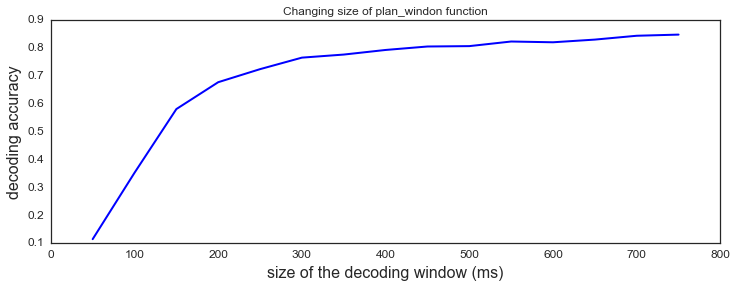

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns # seaborn styles things nicely
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 2, 'font.size': 18, 
            'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 
            'xtick.labelsize': 12 })
sns.set_style('white')

plt.plot(t,result,'b')
plt.title('Changing size of plan_windon function')
plt.xlabel('size of the decoding window (ms)')
plt.ylabel('decoding accuracy')

### Generally, as the growing of size of the decoding window, the decoding accuracy increased, especially within the begining growth(50ms size to around 200ms size). After around 300ms window size, the speed of decoding accuracy increasing gradually slows down.

## b).

In [22]:
# retraining the model by using new location changing window
def changewindow_training2(T):
    
    changewindow_n_plan=[]
    changewindow_n_plantime=[]
    for i in range(len(training_data)):
        p1=r[training_data[i]].timeTouchHeld+T
        p2=p1+200
        changewindow_n_plan2,changewindow_n_plantime2=np.array([]),np.array([])
        for l in range(190):
            if type(r[training_data[i]].unit[l].spikeTimes) == float:   # when there is only one spike and its spiketime
                n_plan0=round(r[training_data[i]].unit[l].spikeTimes) in range(p1,p2)
                n_plan1=int(n_plan0)
            
            elif list(r[training_data[i]].unit[l].spikeTimes) == []:   # when there is no spike and its spiketime
                n_plan1=0
            
            else:                                                     # when there are more than one spikes and their spiketimes
                n_plan0=(r[training_data[i]].unit[l].spikeTimes>p1) & (r[training_data[i]].unit[l].spikeTimes<p2)
                n_plan1=np.sum(n_plan0)
            
        
            changewindow_n_plantime2=np.append(changewindow_n_plantime2,200)
            changewindow_n_plan2=np.append(changewindow_n_plan2,n_plan1)


        changewindow_n_plan.append(changewindow_n_plan2)
        changewindow_n_plantime.append(changewindow_n_plantime2)
    

    changewindow_target0=[cfr[i] for i in training_data]
    changewindow_table1=pd.DataFrame(changewindow_target0,index=training_data,columns=['targets']) # index represent the i th trials
    changewindow_table1['changewindow_n_plan']=changewindow_n_plan
    changewindow_table1['changewindow_n_plantime']=changewindow_n_plantime

    changewindow_table2=changewindow_table1.groupby('targets').sum()
    changewindow_table2['changewindow_training_rate']=changewindow_table2['changewindow_n_plan']/changewindow_table2['changewindow_n_plantime']
    return changewindow_table2

# also test the model using this location changing window
def changewindow_testing2(T):
    changewindow_test_plan=[]
    changewindow_test_plantime=[]
    for i in range(len(testing_data)):
        p1=r[testing_data[i]].timeTouchHeld+T
        p2=p1+200
        changewindow_test_plan2,changewindow_test_plantime2=np.array([]),np.array([])
        for l in range(190):
            if type(r[testing_data[i]].unit[l].spikeTimes) == float:   # when there is only one spike and its spiketime
                test_plan0=round(r[testing_data[i]].unit[l].spikeTimes) in range(p1,p2)
                test_plan1=int(test_plan0)
            
            elif list(r[testing_data[i]].unit[l].spikeTimes) == []:   # when there is no spike and its spiketime
                test_plan1=0
            
            else:                                                     # when there are more than one spikes and their spiketimes
                test_plan0=(r[testing_data[i]].unit[l].spikeTimes>p1) & (r[testing_data[i]].unit[l].spikeTimes<p2)
                test_plan1=np.sum(test_plan0)
            
        
            changewindow_test_plantime2=np.append(changewindow_test_plantime2,200)
            changewindow_test_plan2=np.append(changewindow_test_plan2,test_plan1)


        changewindow_test_plan.append(changewindow_test_plan2)
        changewindow_test_plantime.append(changewindow_test_plantime2) 

    changewindow_test_target0=[cfr[i] for i in testing_data]
    changewindow_test_table1=pd.DataFrame(changewindow_test_target0,index=testing_data,columns=['targets']) # index represent the i th trials
    changewindow_test_table1['changewindow_test_plan']=changewindow_test_plan
    changewindow_test_table1['changewindow_test_plantime']=changewindow_test_plantime
    return changewindow_test_table1

def forecast2(changewindow_test_table1,changewindow_table2):
    changewindow_forecast_target_plan=[]
    for i in range(len(changewindow_test_table1['changewindow_test_plan'])):
        P=[]
        for l in range(8):
            p=poisson.logpmf(list(changewindow_test_table1['changewindow_test_plan'])[i],list(changewindow_table2['changewindow_training_rate'])[l]*list(changewindow_test_table1['changewindow_test_plantime'])[i])
            p2=p.sum()
            P.append(p2)
        tg=P.index(max(P))+1
        changewindow_forecast_target_plan.append(tg)

    changewindow_test_table1['changewindow_forecast_target_plan']=changewindow_forecast_target_plan
    decoded_correctly_plan=changewindow_test_table1[changewindow_test_table1['targets']==changewindow_test_table1['changewindow_forecast_target_plan']]
    decoding_accuracy_plan=len(decoded_correctly_plan)/len(changewindow_test_table1)
    return decoding_accuracy_plan

t=np.arange(50,600,50) #constant 200 ms window, but slide the window start time from target onset (“0”) to 550 ms after target onset (use 50 ms steps)
result2=[]
for T in t:
    changewindow_table2=changewindow_training2(T)
    changewindow_test_table1=changewindow_testing2(T)
    result21=forecast2(changewindow_test_table1,changewindow_table2)
    result2.append(result21)
print(result2)

[0.7510316368638239, 0.782668500687758, 0.7730398899587345, 0.7716643741403026, 0.7524071526822559, 0.7537826685006878, 0.7455295735900963, 0.7469050894085282, 0.782668500687758, 0.8046767537826685, 0.7757909215955984]


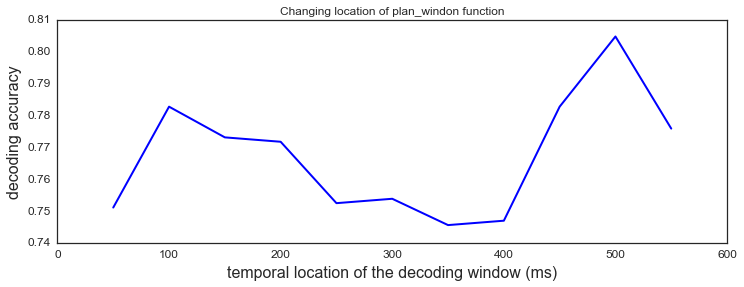

In [23]:
plt.plot(t,result2,'b')
plt.title('Changing location of plan_windon function')
plt.xlabel('temporal location of the decoding window (ms)')
plt.ylabel('decoding accuracy')

### From 50ms to 100ms temporal location of the decoding window, the decoding accuracy increased rapidly. But after 100ms, until 400ms temporal location of the decoding window, the decoding accuracy gradually decreased, even lower than the decoding accuracy which at the beginning of 50ms. After 400ms, the decoding accuracy increased hugely again, reached the maxium accuracy of the whole process, and then fall down again.

# Question3:Number of neurons (30 pts)

In [33]:
# test the model again within those three different windows, and by using changing number of neurons.

def combined_testing(N_neurons):
    test_N=[]
    test_N_time=[]
    for i in range(len(testing_data)):
        p1=r[testing_data[i]].timeTouchHeld
        p2=r[testing_data[i]].timeGoCue
        p3=r[testing_data[i]].timeTargetAcquire
        test_N2,test_N_time2=np.array([]),np.array([])
        for l in N_neurons:
            if type(r[testing_data[i]].unit[l].spikeTimes) == float:
                test_N0=round(r[testing_data[i]].unit[l].spikeTimes) in range(p1,p3)
                test_N1=int(test_N0)
            
            elif list(r[testing_data[i]].unit[l].spikeTimes) == []:
                test_N1=0
            
            else:
                test_N0=(r[testing_data[i]].unit[l].spikeTimes>p1) & (r[testing_data[i]].unit[l].spikeTimes<p3)
                test_N1=np.sum(test_N0)
            
            test_N_time1=p3-p1
       
        
            test_N2=np.append(test_N2,test_N1)
            test_N_time2=np.append(test_N_time2,test_N_time1)
        
        test_N.append(test_N2)
        test_N_time.append(test_N_time2)
    
    test_target0=[cfr[i] for i in testing_data]
    combined_test_table1=pd.DataFrame(test_target0,index=testing_data,columns=['targets']) # index represent the i th trials
    combined_test_table1['Combined']=test_N
    combined_test_table1['Combined_time']=test_N_time
    return combined_test_table1

def plan_testing(N_neurons):
    test_n_plan=[]
    test_n_plantime=[]
    for i in range(len(testing_data)):
        p1=r[testing_data[i]].timeTouchHeld
        p2=r[testing_data[i]].timeGoCue
        p3=r[testing_data[i]].timeTargetAcquire
        test_n_plan2,test_n_plantime2=np.array([]),np.array([])
        for l in N_neurons:
            if type(r[testing_data[i]].unit[l].spikeTimes) == float:
                test_n_plan0=round(r[testing_data[i]].unit[l].spikeTimes) in range(p1,p2)
                test_n_plan1=int(test_n_plan0)
            
            elif list(r[testing_data[i]].unit[l].spikeTimes) == []:
                test_n_plan1=0
            
            else:
                test_n_plan0=(r[testing_data[i]].unit[l].spikeTimes>p1) & (r[testing_data[i]].unit[l].spikeTimes<p2)
                test_n_plan1=np.sum(test_n_plan0)
            

            test_n_plantime1=p2-p1
        

            test_n_plan2=np.append(test_n_plan2,test_n_plan1)
            test_n_plantime2=np.append(test_n_plantime2,test_n_plantime1)


        test_n_plan.append(test_n_plan2)
        test_n_plantime.append(test_n_plantime2)

    test_target0=[cfr[i] for i in testing_data]
    plan_test_table1=pd.DataFrame(test_target0,index=testing_data,columns=['targets']) # index represent the i th trials
    plan_test_table1['n_plan']=test_n_plan
    plan_test_table1['n_plantime']=test_n_plantime
    return plan_test_table1

def move_testing(N_neurons):
    test_n_move=[]
    test_n_movetime=[]
    for i in range(len(testing_data)):
        p1=r[testing_data[i]].timeTouchHeld
        p2=r[testing_data[i]].timeGoCue
        p3=r[testing_data[i]].timeTargetAcquire
        test_n_move2,test_n_movetime2=np.array([]),np.array([])
        for l in N_neurons:
            if type(r[testing_data[i]].unit[l].spikeTimes) == float:
            
                test_n_move0=round(r[testing_data[i]].unit[l].spikeTimes) in range(p2,p3)
                test_n_move1=int(test_n_move0)
            elif list(r[testing_data[i]].unit[l].spikeTimes) == []:
            
                test_n_move1=0
            else:
            
                test_n_move0=(r[testing_data[i]].unit[l].spikeTimes>p2) & (r[testing_data[i]].unit[l].spikeTimes<p3)
                test_n_move1=np.sum(test_n_move0)
        
            test_n_movetime1=p3-p2
        
            test_n_move2=np.append(test_n_move2,test_n_move1)
            test_n_movetime2=np.append(test_n_movetime2,test_n_movetime1)

        test_n_move.append(test_n_move2)
        test_n_movetime.append(test_n_movetime2)

    test_target0=[cfr[i] for i in testing_data]
    move_test_table1=pd.DataFrame(test_target0,index=testing_data,columns=['targets']) # index represent the i th trials
    move_test_table1['n_move']=test_n_move
    move_test_table1['n_movetime']=test_n_movetime
    return move_test_table1

# Also, only using those specific number of neurons' rate to calculate the maximum liklihood parameter estimation.

def combined_forecast(combined_test_table1,N_neurons,table2):
    forecast_target_combined=[]
    for i in range(len(combined_test_table1['Combined'])):
        afterdrop_combined=[]
        for l in range(8):
            afterdrop_combined1=np.array([list(table2['Combined_rate'])[l][i] for i in N_neurons])*list(combined_test_table1['Combined_time'])[i]
            afterdrop_combined.append(afterdrop_combined1)
        p=poisson.logpmf(list(combined_test_table1['Combined'])[i],afterdrop_combined)
        P=list(p.sum(axis=1))
            
        tg=P.index(max(P))+1
        forecast_target_combined.append(tg)

    combined_test_table1['forecast_target_combined']=forecast_target_combined
    decoded_correctly_combined=combined_test_table1[combined_test_table1['targets']==combined_test_table1['forecast_target_combined']]
    decoding_accuracy_combined=len(decoded_correctly_combined)/len(combined_test_table1)

    return decoding_accuracy_combined

def plan_forecast(plan_test_table1,N_neurons,table2):
    forecast_target_plan=[]
    for i in range(len(plan_test_table1['n_plan'])):
        afterdrop_plan=[]
        for l in range(8):
            afterdrop_plan1=np.array([list(table2['n_plan_rate'])[l][i] for i in N_neurons])*list(plan_test_table1['n_plantime'])[i]
            afterdrop_plan.append(afterdrop_plan1)
        p=poisson.logpmf(list(plan_test_table1['n_plan'])[i],afterdrop_plan)
        P=list(p.sum(axis=1))
            
        tg=P.index(max(P))+1
        forecast_target_plan.append(tg)
           

    plan_test_table1['forecast_target_plan']=forecast_target_plan
    decoded_correctly_plan=plan_test_table1[plan_test_table1['targets']==plan_test_table1['forecast_target_plan']]
    decoding_accuracy_plan=len(decoded_correctly_plan)/len(plan_test_table1)
    return decoding_accuracy_plan

def move_forecast(move_test_table1,N_neurons,table2):
    forecast_target_move=[]
    for i in range(len(move_test_table1['n_move'])):
        
        afterdrop_move=[]
        for l in range(8):
            afterdrop_move1=np.array([list(table2['n_move_rate'])[l][i] for i in N_neurons])*list(move_test_table1['n_movetime'])[i]
            afterdrop_move.append(afterdrop_move1)
        p=poisson.logpmf(list(move_test_table1['n_move'])[i],afterdrop_move)
        P=list(p.sum(axis=1))
            
        tg=P.index(max(P))+1
        forecast_target_move.append(tg)

    move_test_table1['forecast_target_move']=forecast_target_move
    decoded_correctly_move=move_test_table1[move_test_table1['targets']==move_test_table1['forecast_target_move']]
    decoding_accuracy_move=len(decoded_correctly_move)/len(move_test_table1)

    return decoding_accuracy_move

In [34]:
import time
start_time=time.time()

accuracy_combined=[]
#  Eliminate between 20 and 180 neurons (by 20s – so decode using between 10 and 190 neurons in steps of 20)
for i in range(20):
    t=np.arange(20,200,20)
    after_drop=[]
    for T in t:
        origin=set(np.arange(190))
        drop=set(random.sample(range(190),T))
        after_drop1=origin-drop
        after_drop.append(after_drop1)
    
    accuracy_combined1=[]
    for N_neurons in after_drop:
        combined_test_table1=combined_testing(N_neurons)
        decoding_accuracy_combined=combined_forecast(combined_test_table1,N_neurons,table2)
        accuracy_combined1.append(decoding_accuracy_combined)
    accuracy_combined1.reverse()
    accuracy_combined1.append(0.99037)
    accuracy_combined1=np.array(accuracy_combined1)
    accuracy_combined.append(accuracy_combined1)
print(accuracy_combined)

print("%s seconds" % (time.time() - start_time))

[array([ 0.65474553,  0.90784044,  0.93397524,  0.92984869,  0.97661623,
        0.98762036,  0.98486933,  0.98624484,  0.98211829,  0.99037   ]), array([ 0.49656121,  0.83081155,  0.94085282,  0.96973865,  0.98349381,
        0.98074278,  0.98624484,  0.98624484,  0.98624484,  0.99037   ]), array([ 0.68638239,  0.91059147,  0.96973865,  0.96836314,  0.95598349,
        0.97111417,  0.98211829,  0.98624484,  0.99174691,  0.99037   ]), array([ 0.71526823,  0.93672627,  0.95598349,  0.9738652 ,  0.99174691,
        0.98762036,  0.98486933,  0.98349381,  0.98899587,  0.99037   ]), array([ 0.77166437,  0.82255846,  0.91471802,  0.96148556,  0.96423659,
        0.98486933,  0.98762036,  0.98899587,  0.99037139,  0.99037   ]), array([ 0.71251719,  0.9133425 ,  0.9656121 ,  0.97524072,  0.94910591,
        0.98624484,  0.98211829,  0.98211829,  0.99174691,  0.99037   ]), array([ 0.5914718 ,  0.9215956 ,  0.9133425 ,  0.95735901,  0.98486933,
        0.98486933,  0.98486933,  0.99174691,  0.99

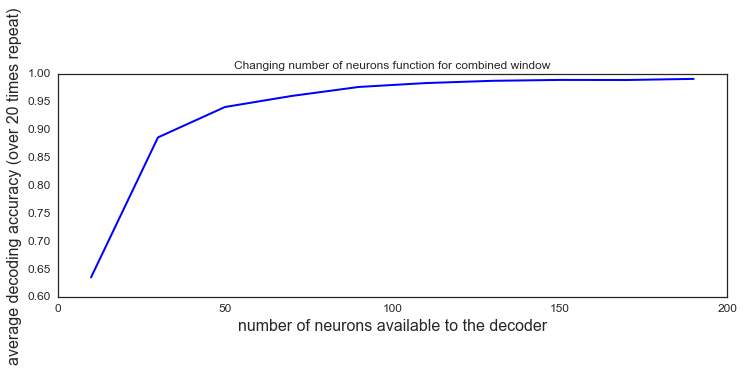

In [47]:
average_accuracy_combined=sum(accuracy_combined)/20 # I only average all after 20 times drops' data, and plot it
number_neurons=np.arange(10,210,20)
plt.plot(number_neurons,average_accuracy_combined,'b')
plt.title('Changing number of neurons function for combined window')
plt.xlabel('number of neurons available to the decoder')
plt.ylabel('average decoding accuracy (over 20 times repeat)')

In [46]:
start_time=time.time()

accuracy_plan=[]
for i in range(20):
    t=np.arange(20,200,20)
    after_drop=[]
    for T in t:
        origin=set(np.arange(190))
        drop=set(random.sample(range(190),T))
        after_drop1=origin-drop
        after_drop.append(after_drop1)
    
    accuracy_plan1=[]
    for N_neurons in after_drop:
        plan_test_table1=plan_testing(N_neurons)
        decoding_accuracy_plan=plan_forecast(plan_test_table1,N_neurons,table2)
        accuracy_plan1.append(decoding_accuracy_plan)
    accuracy_plan1.reverse()
    accuracy_plan1.append(0.84732)
    accuracy_plan1=np.array(accuracy_plan1)
    accuracy_plan.append(accuracy_plan1)
print(accuracy_plan)

print("%s seconds" % (time.time() - start_time))

[array([ 0.53094911,  0.70151307,  0.86657497,  0.83631362,  0.89408528,
        0.87620358,  0.84869326,  0.87207703,  0.83218707,  0.84732   ]), array([ 0.57221458,  0.78541953,  0.81017882,  0.92709766,  0.87345254,
        0.88033012,  0.8872077 ,  0.86244842,  0.86657497,  0.84732   ]), array([ 0.60660248,  0.82255846,  0.83218707,  0.87895461,  0.89133425,
        0.8431912 ,  0.8610729 ,  0.8872077 ,  0.85144429,  0.84732   ]), array([ 0.64236589,  0.74415406,  0.79504814,  0.91196699,  0.85419532,
        0.85144429,  0.89408528,  0.84731774,  0.84181568,  0.84732   ]), array([ 0.51169188,  0.78541953,  0.85144429,  0.90508941,  0.85969739,
        0.91471802,  0.86795048,  0.87895461,  0.85832187,  0.84732   ]), array([ 0.35213205,  0.69050894,  0.85694635,  0.84594223,  0.90646492,
        0.82530949,  0.86244842,  0.85694635,  0.85557084,  0.84732   ]), array([ 0.56396149,  0.67125172,  0.79917469,  0.87070151,  0.88170564,
        0.87757909,  0.91059147,  0.85557084,  0.87

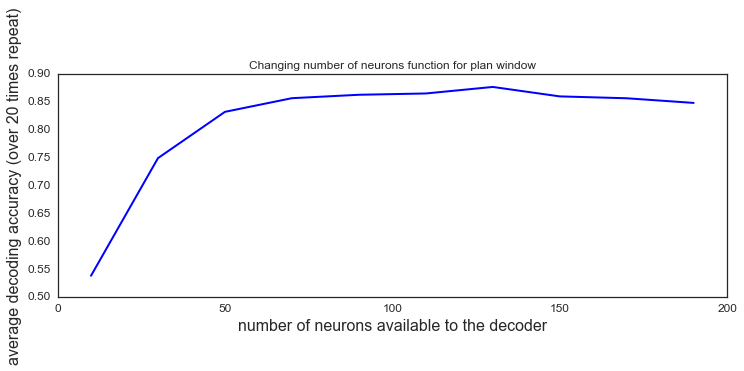

In [48]:
average_accuracy_plan=sum(accuracy_plan)/20
number_neurons=np.arange(10,210,20)
plt.plot(number_neurons,average_accuracy_plan,'b')
plt.title('Changing number of neurons function for plan window')
plt.xlabel('number of neurons available to the decoder')
plt.ylabel('average decoding accuracy (over 20 times repeat)')

In [49]:
start_time=time.time()

accuracy_move=[]
for i in range(20):
    t=np.arange(20,200,20)
    after_drop=[]
    for T in t:
        origin=set(np.arange(190))
        drop=set(random.sample(range(190),T))
        after_drop1=origin-drop
        after_drop.append(after_drop1)
    
    accuracy_move1=[]
    for N_neurons in after_drop:
        move_test_table1=move_testing(N_neurons)
        decoding_accuracy_move=move_forecast(move_test_table1,N_neurons,table2)
        accuracy_move1.append(decoding_accuracy_move)
    accuracy_move1.reverse()
    accuracy_move1.append(0.94085)
    accuracy_move1=np.array(accuracy_move1)
    accuracy_move.append(accuracy_move1)
print(accuracy_move)

print("%s seconds" % (time.time() - start_time))

[array([ 0.67125172,  0.78541953,  0.8872077 ,  0.96286107,  0.95460798,
        0.95735901,  0.95598349,  0.95735901,  0.94085282,  0.94085   ]), array([ 0.85006878,  0.85969739,  0.92297111,  0.96011004,  0.96286107,
        0.96148556,  0.91884457,  0.93672627,  0.9394773 ,  0.94085   ]), array([ 0.51031637,  0.8954608 ,  0.93122421,  0.9394773 ,  0.95460798,
        0.96011004,  0.95048143,  0.95323246,  0.93672627,  0.94085   ]), array([ 0.56121045,  0.80467675,  0.89408528,  0.96011004,  0.96423659,
        0.96286107,  0.93810179,  0.95048143,  0.94635488,  0.94085   ]), array([ 0.66850069,  0.8954608 ,  0.94910591,  0.94085282,  0.94085282,
        0.96423659,  0.94910591,  0.94910591,  0.95323246,  0.94085   ]), array([ 0.53094911,  0.85557084,  0.9133425 ,  0.96148556,  0.93810179,
        0.95323246,  0.94222834,  0.95185695,  0.95185695,  0.94085   ]), array([ 0.70013755,  0.89133425,  0.91609354,  0.97248968,  0.93259972,
        0.94360385,  0.94635488,  0.93810179,  0.94

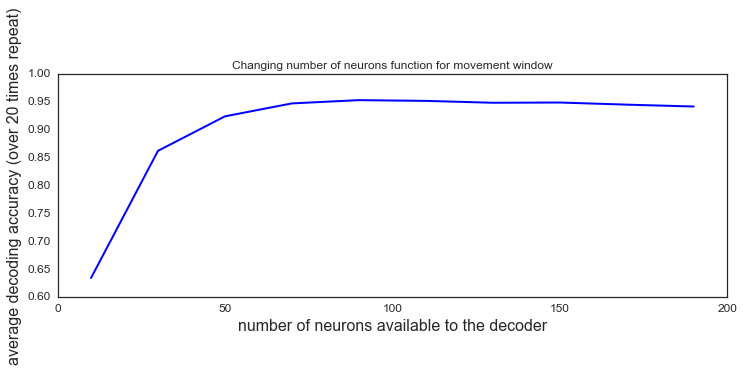

In [50]:
average_accuracy_move=sum(accuracy_move)/20
number_neurons=np.arange(10,210,20)
plt.plot(number_neurons,average_accuracy_move,'b')
plt.title('Changing number of neurons function for movement window')
plt.xlabel('number of neurons available to the decoder')
plt.ylabel('average decoding accuracy (over 20 times repeat)')

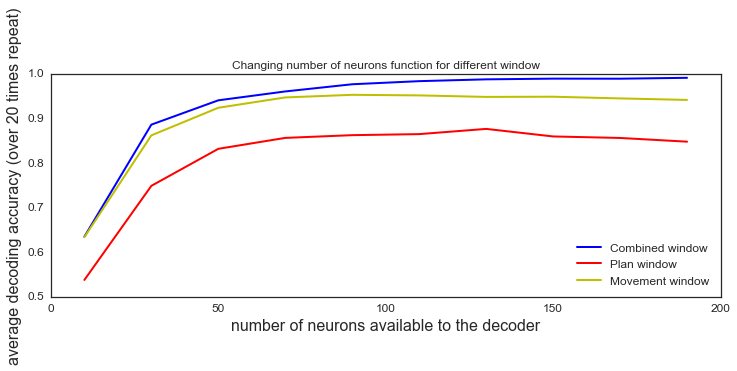

In [71]:
%matplotlib inline

import seaborn as sns # seaborn styles things nicely
sns.set(rc={'figure.figsize': (12, 4),'lines.linewidth': 2, 'font.size': 18, 
            'axes.labelsize': 16, 'legend.fontsize': 12, 'ytick.labelsize': 12, 
            'xtick.labelsize': 12 })
sns.set_style('white')



plt.title('Changing number of neurons function for different window')
plt.xlabel('number of neurons available to the decoder')
plt.ylabel('average decoding accuracy (over 20 times repeat)')

plt.plot(number_neurons,average_accuracy_combined,'b',label='Combined window')
plt.plot(number_neurons,average_accuracy_plan,'r',label='Plan window')
plt.plot(number_neurons,average_accuracy_move,'y',label='Movement window')

legend=plt.legend(loc='best')

### For all three windows, generally, as the size of window growing, the average decoding accuracy increased. And their accuracy's growth patterns are almost similar to each other(which described in problem2_a). However, it's still clear to see that the overall decoding accuracy of combined window is higher than its movement window, which is also higher than plan window. And this pattern is also consistent with the result from problem1.